<a href="https://colab.research.google.com/github/kropotin4/Notebooks/blob/master/exStar1_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
!pip install tensorflow -q

In [136]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [138]:
#@title ## Параметры Star1 

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/data/" #@param {type:"string"}
 
N_VAR = 6       #@param {type:"number"}

In [139]:
dtype = np.double

path_end = str(N_VAR).zfill(4) + ".csv"
train_features = pd.read_csv(DATA_PATH + "lab1/train_features_" + path_end, header=None, squeeze=True, dtype=dtype)
train_labels   = pd.read_csv(DATA_PATH + "lab1/train_labels_"   + path_end, header=None, squeeze=False, dtype=dtype)
test_features  = pd.read_csv(DATA_PATH + "lab1/test_features_"  + path_end, header=None, squeeze=True, dtype=dtype)

test_labels    = pd.read_csv(DATA_PATH + "lab1.csv", header=None, squeeze=True, dtype=dtype)

hack_features = pd.read_csv(DATA_PATH + "hack_features.csv", header=None, squeeze=True, dtype=dtype)
hack_labels   = pd.read_csv(DATA_PATH + "hack_labels.csv", header=None, squeeze=False, dtype=dtype)

In [159]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [173]:
model = keras.Sequential(name="Best")

lrelu = lambda x: keras.activations.relu(x, alpha=0.01)
relu = keras.activations.relu
sig = keras.activations.sigmoid
swish = keras.activations.swish

activ_func = swish

model.add(tf.keras.Input(shape=(1,)))

#model.add(Dense(units=1, activation=activ_func, name="Input"))
model.add(Dense(units=18, activation=activ_func, name="Hidden1"))
#model.add(Dense(units=18, activation=activ_func, name="Hidden2"))
model.add(Dense(units=1, activation='linear', name="Output"))

adam = keras.optimizers.Adam(0.1)
sgd = keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=True)

model.compile(loss='mean_squared_error', optimizer=adam)

In [142]:
#print(model.summary())

In [174]:
log = model.fit(train_features, train_labels, epochs=5000, verbose=False)

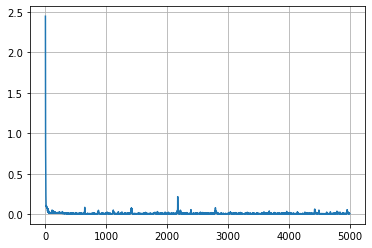

In [175]:
plt.plot(log.history['loss'])
plt.grid(True)
plt.show()

In [176]:
from sklearn.metrics import r2_score

print(r2_score(test_labels.to_numpy(), model.predict(test_features)))

0.9159448283462834
